
From given dataset with images and annotations for binary image classification, I have come to idea of implementing CNN with cropped images by getting region information from annotation filee bounding boxes.

Approach advantages:
*   reduce data size, easy to train data
*   reduce noise, increase visability


After I will use multiple tecniques to improve model performance.

*   Hyperparameter tuning
*   Regularization techniques

Then I will compare models performances and choose the best one.



# Import dependencies and set-up

In [5]:
!pip install tensorflow keras h5py opencv-python matplotlib numpy pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import os
import cv2
import numpy as np
import xml.etree.ElementTree as ET
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from sklearn.metrics import classification_report
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Data loading

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# path to the directory containing the XML files
annot_folder = '/content/drive/MyDrive/archive/annotations/'

# path to the directory containing the images
image_folder = '/content/drive/MyDrive/archive/images/'

## Image cropping

In [9]:

images = []
labels = []

In [10]:
img_size = (128, 128)

In [11]:
for file in os.listdir(annot_folder):
    if file.endswith('.xml'):
        # Parse the XML file to extract the bounding box coordinates
        tree = ET.parse(os.path.join(annot_folder, file))
        root = tree.getroot()
        xmin = int(root.find('object/bndbox/xmin').text)
        xmax = int(root.find('object/bndbox/xmax').text)
        ymin = int(root.find('object/bndbox/ymin').text)
        ymax = int(root.find('object/bndbox/ymax').text)
        # Load the corresponding image and crop it to the bounding box
        img_path = os.path.join(image_folder, file[:-4]+'.png')
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img[ymin:ymax, xmin:xmax], img_size)
        images.append(img)
        # Set the label based on the class of the object
        if root.find('object/name').text == 'dog':
            labels.append(1)
        else:
            labels.append(0)


# Data preprocessing

In [12]:
# Convert data to numpy arrays
images = np.array(images)
labels = np.array(labels)

In [15]:
images[0].shape

(128, 128)

In [16]:
len(labels)

3686

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

In [18]:
# Normalize the pixel values of the images
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Reshape the data to be compatible with the CNN model
X_train = X_train.reshape(-1, img_size[0], img_size[1], 1)
X_test = X_test.reshape(-1, img_size[0], img_size[1], 1)

# Building model

In [19]:
# Build the CNN model
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [21]:

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# Train the model
results1 = model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
93/93 [==============================] - 123s 1s/step - loss: 0.5270 - accuracy: 0.7280 - val_loss: 0.3798 - val_accuracy: 0.8591
Epoch 2/10
93/93 [==============================] - 132s 1s/step - loss: 0.3169 - accuracy: 0.8636 - val_loss: 0.2670 - val_accuracy: 0.8984
Epoch 3/10
93/93 [==============================] - 111s 1s/step - loss: 0.2321 - accuracy: 0.9057 - val_loss: 0.2681 - val_accuracy: 0.9038
Epoch 4/10
93/93 [==============================] - 110s 1s/step - loss: 0.1758 - accuracy: 0.9305 - val_loss: 0.2031 - val_accuracy: 0.9309
Epoch 5/10
93/93 [==============================] - 106s 1s/step - loss: 0.1440 - accuracy: 0.9417 - val_loss: 0.1882 - val_accuracy: 0.9282
Epoch 6/10
93/93 [==============================] - 111s 1s/step - loss: 0.1558 - accuracy: 0.9406 - val_loss: 0.2073 - val_accuracy: 0.9336
Epoch 7/10
93/93 [==============================] - 110s 1s/step - loss: 0.0770 - accuracy: 0.9722 - val_loss: 0.2515 - val_accuracy: 0.9268
Epoch 8/10
93

### Hyperparameter tuning

In [23]:
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [25]:
model2.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
results2 = model2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
93/93 [==============================] - 115s 1s/step - loss: 0.6035 - accuracy: 0.6737 - val_loss: 0.5359 - val_accuracy: 0.6951
Epoch 2/20
93/93 [==============================] - 111s 1s/step - loss: 0.4628 - accuracy: 0.7748 - val_loss: 0.3496 - val_accuracy: 0.8686
Epoch 3/20
93/93 [==============================] - 108s 1s/step - loss: 0.3664 - accuracy: 0.8491 - val_loss: 0.3158 - val_accuracy: 0.8780
Epoch 4/20
93/93 [==============================] - 114s 1s/step - loss: 0.3235 - accuracy: 0.8647 - val_loss: 0.2734 - val_accuracy: 0.9024
Epoch 5/20
93/93 [==============================] - 110s 1s/step - loss: 0.2919 - accuracy: 0.8877 - val_loss: 0.2322 - val_accuracy: 0.9146
Epoch 6/20
93/93 [==============================] - 115s 1s/step - loss: 0.2681 - accuracy: 0.8942 - val_loss: 0.2329 - val_accuracy: 0.9146
Epoch 7/20
93/93 [==============================] - 113s 1s/step - loss: 0.2506 - accuracy: 0.9013 - val_loss: 0.2457 - val_accuracy: 0.9146
Epoch 8/20
93

### Regularization techniques

In [29]:
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [30]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
results3 = model3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
93/93 [==============================] - 145s 2s/step - loss: 0.5012 - accuracy: 0.8016 - val_loss: 1.5065 - val_accuracy: 0.6870
Epoch 2/10
93/93 [==============================] - 136s 1s/step - loss: 0.2896 - accuracy: 0.8847 - val_loss: 0.9621 - val_accuracy: 0.6870
Epoch 3/10
93/93 [==============================] - 139s 1s/step - loss: 0.1922 - accuracy: 0.9264 - val_loss: 0.9343 - val_accuracy: 0.6870
Epoch 4/10
93/93 [==============================] - 136s 1s/step - loss: 0.1228 - accuracy: 0.9512 - val_loss: 0.3254 - val_accuracy: 0.8645
Epoch 5/10
93/93 [==============================] - 135s 1s/step - loss: 0.1907 - accuracy: 0.9230 - val_loss: 0.2908 - val_accuracy: 0.8794
Epoch 6/10
93/93 [==============================] - 142s 2s/step - loss: 0.0874 - accuracy: 0.9678 - val_loss: 0.1802 - val_accuracy: 0.9336
Epoch 7/10
93/93 [==============================] - 136s 1s/step - loss: 0.0643 - accuracy: 0.9752 - val_loss: 0.1606 - val_accuracy: 0.9295
Epoch 8/10
93

# Evaluate

In [44]:
# Evaluate the models on the test set
test_loss1, test_acc1 = model1.evaluate(X_test, y_test)
test_loss2, test_acc2 = model2.evaluate(X_test, y_test)
test_loss3, test_acc3 = model3.evaluate(X_test, y_test)

# Print the test accuracy of each model
print("Model 1 test accuracy:", test_acc1)
print("Model 2 test accuracy:", test_acc2)
print("Model 3 test accuracy:", test_acc3)

24/24 [==============================] - 7s 299ms/step - loss: 0.3482 - accuracy: 0.8970
Model 1 test accuracy: 0.9376693964004517
Model 2 test accuracy: 0.9417344331741333
Model 3 test accuracy: 0.8970189690589905


# Plot performance

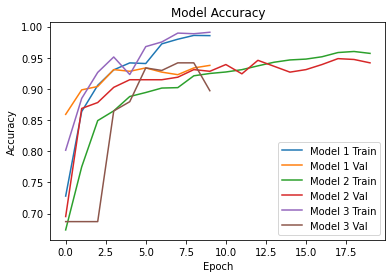

In [36]:
# Plot learning curves
plt.plot(results1.history['accuracy'])
plt.plot(results1.history['val_accuracy'])
plt.plot(results2.history['accuracy'])
plt.plot(results2.history['val_accuracy'])
plt.plot(results3.history['accuracy'])
plt.plot(results3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model 1 Train', 'Model 1 Val', 'Model 2 Train', 'Model 2 Val', 'Model 3 Train', 'Model 3 Val'], loc='lower right')
plt.show()

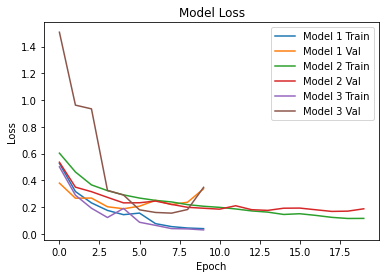

In [37]:
plt.plot(results1.history['loss'])
plt.plot(results1.history['val_loss'])
plt.plot(results2.history['loss'])
plt.plot(results2.history['val_loss'])
plt.plot(results3.history['loss'])
plt.plot(results3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Model 1 Train', 'Model 1 Val', 'Model 2 Train', 'Model 2 Val', 'Model 3 Train', 'Model 3 Val'], loc='upper right')
plt.show()

# Saving model

In [46]:
model2.save(os.path.join('models','imageclassifier.h5'))